# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

### Note: additional steps were taken as part of this assignment in order to attempt to provide additional insight and enhance accessibility. Those steps are generally noted with headers like this "Additional ___ step" ####

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



**Statistical methods:**
- Seaborn .boxplot() function creates a boxplot with data points 1.5x beyond the IQR which are considered outliers according to Tukey's method
- Scipy.stats z_socore and modified_z_sscores cah show data withs zscores above a -/+ 3 threshold indicating they are as many standard deviations from the mean

**Heuristic methods:**
- DataFrame method df.describe() returns general stats about the df which can help determine outliers
- Matplotlib.pyplt scatter() can helps visualize relationships between variables and identify potential outliers
- DataFrame method .hist() can show the distribution of data to help highlight potential outliers

**Decision-making:**
After identifying a data point is an outlier I'd first ask the data source whether they can confirm it is not an error. If it is and error, I'd exlude it. If they can't confirm, I have three options for the outliers: a) keep them; b) reassign them; or c) exclude them.

- <u>Keep</u>: For a dataset I plan to do EDA on and nothing else or for one I'm preparing for a model that is resistent to outliers I'll most likely leave them.


- <u>Keep and reassign</u>: If the dataset is small and/or will be used for modeling or machine learning that isn't outlier tolerant, I'd most likely derive new values to replace the outliers using an imputed mean or average or placing them within a floor and ceiling (10percentile to 90th percentile) at a quantile 


- <u>Exclude</u>: if the outlier is a likely a mistake, typo, error and the data will be used for modeling or machine learning

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [92]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [93]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [94]:
# Display and examine the first few rows of the dataframe
data.head()


# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

In [95]:
# Get the size of the data
data.size

232584

In [96]:
# Get the shape of the data
data.shape


(19382, 12)

Get basic information about the data, using `.info()`.

In [97]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [98]:
# Generate a table of descriptive statistics
data.describe()

#      video_id  video_duration_sec  video_view_count  \
count  19382.000000  1.938200e+04        19382.000000      19084.000000   
mean    9691.500000  5.627454e+09           32.421732     254708.558688   
std     5595.245794  2.536440e+09           16.229967     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4846.250000  3.430417e+09           18.000000       4942.500000   
50%     9691.500000  5.618664e+09           32.000000       9954.500000   
75%    14536.750000  7.843960e+09           47.000000     504327.000000   
max    19382.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000           0.000000              0.000000   
25%          810.750000         115.000000              7.000000   
50%         3403.500000         717.000000             46.000000   
75%       125020.000000       18222.000000           1156.250000   
max       657830.000000      256130.000000          14994.000000   

       video_comment_count  
count         19084.000000  
mean            349.312146  
std             799.638865  
min               0.000000  
25%               1.000000  
50%               9.000000  
75%             292.000000  
max            9599.000000

In [99]:
# sort by missing values
missing_values_sorted = data.isnull().sum().sort_values(ascending=False)
print(missing_values_sorted)
print()

# calculate the amount of the total missing
data_missing = missing_values_sorted.sum()

# print the percentage of missing data
print("Percent of missing values: {:.2f}%".format((data_missing/data.size)*100))

claim_status                298
video_transcription_text    298
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
#                             0
video_id                      0
video_duration_sec            0
verified_status               0
author_ban_status             0
dtype: int64

Percent of missing values: 0.90%


In [100]:
# Handle missing data 

# fill numerical enagement feature columns with the median
engagement_features = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
for feature in engagement_features:
    data[feature].fillna(data[feature].median(), inplace=True)

# for categorical data temporarily fill it with Unknown; 
# may have to remove 'Unknowns' entirely later
categorical_features = ['claim_status', 'video_transcription_text']
for feature in categorical_features:
    data[feature].fillna('Unknown', inplace=True)
    
# verify missing was handled
print(data.isnull().sum())


#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64


In [101]:
# Check for duplicates and remove any
initial_shape = data.shape
data.drop_duplicates(inplace=True)
final_shape = data.shape
print(f'Duplicates removed: {initial_shape[0] - final_shape[0]}')

Duplicates removed: 0


### Additional validation steps###

In [102]:
# Validate categorical data since it wasn't validated by .describe()

# validate categorical data 
claim_status_counts = data['claim_status'].value_counts().rename_axis('claim').reset_index(name='counts')
verified_status_counts = data['verified_status'].value_counts().rename_axis('verified').reset_index(name='counts')
author_ban_counts = data['author_ban_status'].value_counts().rename_axis('author_ban').reset_index(name='counts')

print(claim_status_counts)
print()
print(verified_status_counts)
print()
print(author_ban_counts)


     claim  counts
0    claim    9608
1  opinion    9476
2  Unknown     298

       verified  counts
0  not verified   18142
1      verified    1240

     author_ban  counts
0        active   15663
1  under review    2080
2        banned    1639


### Additional feature engineering steps###

In [103]:
# create a feature for numeric video engagement that might be helpful for later analysis (likes + shares + downloads + comments)
data['engagement'] = data['video_view_count'] + data['video_like_count'] + data['video_share_count'] + data['video_download_count'] + data['video_comment_count'] 

In [104]:
# While we can see from describe() lets confirm whether log transformation is useful for normalization of engagement_features
# compare the medians to the top 90 percentile to determine statistical significance of skew

# if the ratio of the 90th percentile to the median is greater than 1.5 we'll consider it skewed
results = {'Metric': [], 'Median': [], '90th Percentile': [], 'Ratio (90th Percentile / Median)': []}

# calculate median, 90th percentile, and the ratio
for metric in engagement_features:
    median_val = data[metric].median()
    perc_90_val = data[metric].quantile(0.90)
    ratio = perc_90_val / median_val
    
    results['Metric'].append(metric)
    results['Median'].append(median_val)
    results['90th Percentile'].append(perc_90_val)
    results['Ratio (90th Percentile / Median)'].append(ratio)

results_df = pd.DataFrame(results)
results_df 

Metric  Median  90th Percentile  \
0      video_view_count  9954.5         800354.0   
1      video_like_count  3403.5         291509.9   
2     video_share_count   717.0          57610.7   
3  video_download_count    46.0           3527.8   
4   video_comment_count     9.0           1100.0   

   Ratio (90th Percentile / Median)  
0                         80.401226  
1                         85.650037  
2                         80.349651  
3                         76.691304  
4                        122.222222

**Conclusion**: The ratio of 90th percentile to median is greater than 1 for each engagement metric providing strong evidence for right-skewedness. This rationalizes using log transformation for normalization.

In [105]:
# apply log transformation to the engagement metrics
# add 1 to avoid the log(0) issue
data['log_video_view_count'] = np.log1p(data['video_view_count'])
data['log_video_like_count'] = np.log1p(data['video_like_count'])
data['log_video_share_count'] = np.log1p(data['video_share_count'])
data['log_video_download_count'] = np.log1p(data['video_download_count'])
data['log_video_comment_count'] = np.log1p(data['video_comment_count'])

# check
data.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  engagement  \
0                   1.0                  0.0    362963.0   
1                1161.0                684.0    239111.0   
2                 833.0                329.0   1003895.0   
3                1234.0                584.0    714090.0   
4                 547.0                152.0     95963.0   

   log_video_view_count  log_video_like_count  log_video_share_count  \
0             12.746351              9.874368               5.488938   
1             11.855650             11.256173               9.854035   
2             13.712576             11.489565               7.958227   
3             12.988848             12.388207              10.457746   
4             10.936102             10.462760               8.321422   

   log_video_download_count  log_video_comment_count  
0                  0.693147                 0.000000  
1                  7.057898                 6.529419  
2                  6.726233                 5.799093  
3                  7.118826                 6.371612  
4                  6.306275                 5.030438

In [106]:
# validate engagement features

print(data[engagement_features].dtypes)

video_view_count        float64
video_like_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object


In [107]:
# double-check data post validation steps
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19382 entries, 0 to 19381
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19382 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19382 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19382 non-null  float64
 8   video_like_count          19382 non-null  float64
 9   video_share_count         19382 non-null  float64
 10  video_download_count      19382 non-null  float64
 11  video_comment_count       19382 non-null  float64
 12  engagement                19382 non-null  float64
 13  log_video_view_count      19382 non-null  float64
 14  log_vi

### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


- Bar charts fo compare opinion count to claim count
- Scatterplots to show the relationships between the engagement metrics. Ideally these should be log transformed due to the wide ranges
- Box plots to show what the skewed data across the engagement metrics (eg views, likes, shares, downloads, and comments). This will identify outliers, help demonstrate the difference in median vs max and quartiles and visualize the standard deviation
- Grouped heatmaps might also be useful to visualize the correlation between any two variables

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

### Additional visualization step ###

In [108]:
# setting a simple accessible visualization style
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
claim_color ="#003f5c"
opinion_color ="#bc5090"

# set up the style
plt.style.use("seaborn-whitegrid")
sns.set_palette(colors)
sns.set_context("notebook", font_scale=1.2)

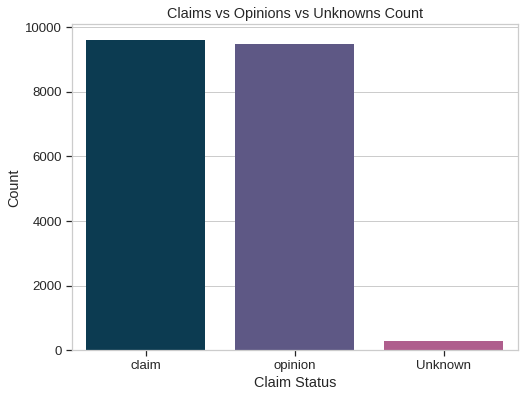

In [109]:
# bar plot for claim vs opinion count
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='claim_status')
plt.title('Claims vs Opinions vs Unknowns Count')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

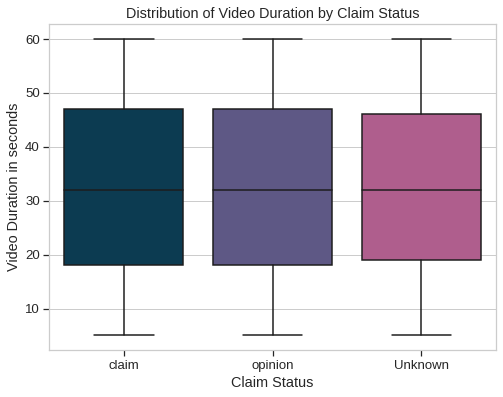

In [110]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(8,6))
sns.boxplot(x='claim_status', y='video_duration_sec', data=data)
plt.xlabel('Claim Status')
plt.ylabel('Video Duration in seconds')
plt.title('Distribution of Video Duration by Claim Status')

plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

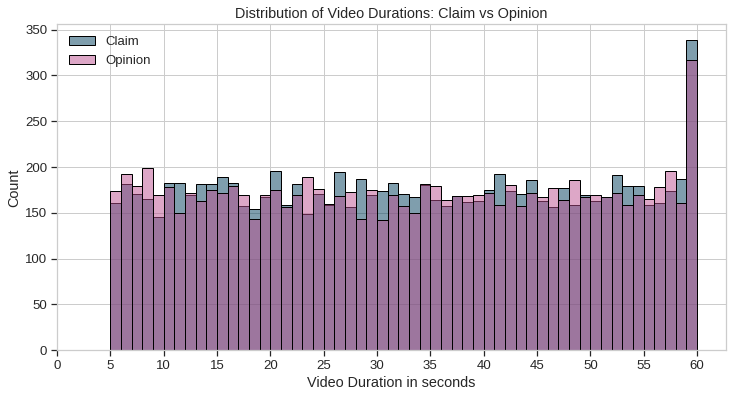

In [111]:
# Create a histogram of video duration
plt.figure(figsize=(12,6))
sns.histplot(data=data[data['claim_status'] == 'claim'], x='video_duration_sec', bins=range(5,61), color=claim_color, alpha=0.5, label='Claim')
sns.histplot(data=data[data['claim_status'] == 'opinion'], x='video_duration_sec', bins=range(5,61), color=opinion_color, alpha=0.5, label='Opinion')
plt.xlabel('Video Duration in seconds')
plt.ylabel('Count')
plt.title('Distribution of Video Durations: Claim vs Opinion')
plt.xticks(range(0, 61, 5))
plt.legend()
plt.show()

**Question:** What do you notice about the duration and distribution of the videos?
- There is no noticeable difference between claim and opinion duration length apart from the fact that there are more claim videos that reach the maximum duration of 60 seconds
- There is a broad range of duration and the distribution is relatively apart from the spike at 60
- The outsized portion of claim videos that reach the 60 second mark should be further explored
- As of may 2024 the available options for time - set during upload - are 15 seconds, 60 seconds, 10 minutes, and 30 minutes. It might be worth considering segmenting by 4 different classes
- I'm curious as to whether the sample included all videos over 60 seconds in the 60 second bucket? 

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

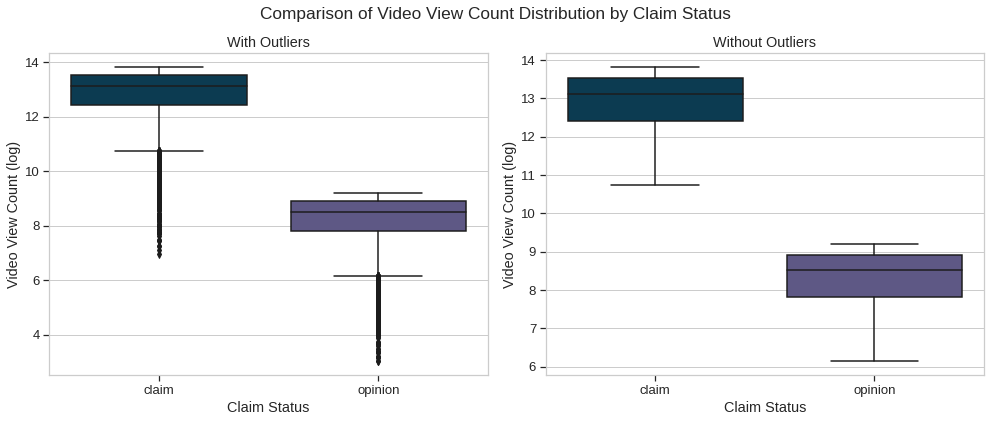

In [112]:
# Create a boxplot to visualize distribution of `video_view_count`

#filter out Unknowns
data_filtered = data[(data['claim_status'] != 'Unknown') & (data['verified_status'] != 'Unknown')]

plt.figure(figsize=(14, 6))

# boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_view_count', data=data_filtered, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video View Count (log)')
plt.title('With Outliers')

# boxplot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_view_count', data=data_filtered, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video View Count (log)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video View Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

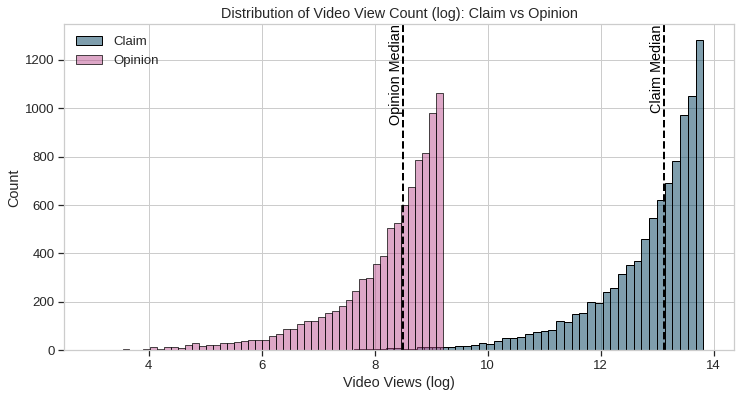

In [113]:
# Create a histogram of video view count
plt.figure(figsize=(12,6))
sns.histplot(data=data[data['claim_status'] == 'claim'], x='log_video_view_count', bins=50, color=claim_color, alpha=0.5, label='Claim')
sns.histplot(data=data[data['claim_status'] == 'opinion'], x='log_video_view_count', bins=50, color=opinion_color, alpha=0.5, label='Opinion')

claim_median = data[data['claim_status'] == 'claim']['log_video_view_count'].median()
opinion_median = data[data['claim_status'] == 'opinion']['log_video_view_count'].median()

# add median lines
plt.axvline(claim_median, color='black', linestyle='--', linewidth=2)
plt.axvline(opinion_median, color='black', linestyle='--', linewidth=2)

# add median labels
plt.text(claim_median, plt.ylim()[1], 'Claim Median', 
         rotation=90, va='top', ha='right', color='black')
plt.text(opinion_median, plt.ylim()[1], 'Opinion Median', 
         rotation=90, va='top', ha='right', color='black')

plt.xlabel('Video Views (log)')
plt.ylabel('Count')
plt.title('Distribution of Video View Count (log): Claim vs Opinion')
plt.legend()

plt.show()

**Question:** What do you notice about the distribution of this variable

### Additional minimum claim status video view count step ###


In [114]:
# minimum # of views of 'claim' video data
data_filtered[data_filtered['claim_status'] == 'claim']['video_view_count'].min()

1049.0

**Insights**
- Claim videos have a much higher median and central tendency relative to opinion data
- Both categories are highly skewed as indicated by the significant outliers on the low end
- The boxplot and the histogram lead me to believe that none of the claim videos had video view counts below ~1,000. 
- Filtering video_view_count for claims reveals that the minimum is 1,049 views. This is highly unlikely in a random set of 9,608 claim videos. And while I've filtered out 298 videos that did not have a claim_status, this still doesnt account for the high minimum. This leads me to believe that there might have been a sampling error or some minimum threshold applied for claim before the EDA process. There could be a sampling or synthetic data generation bias. 
- We should investigate whether there was a thershold applied unevenly to claim and opinion data.
- Given the outliers we may want to consider how to handle them (transformationsm etc)
- The lack of overlap in distributions indicate that claim videos in this sample generally have higher view counts than opinion videos
- Claim videos have a large number of videos in the low view count with a significant tail extending into the high view count. The majority of videos have views in higher ranges (eg >100K) while there are many more opinion videos at in the 1K-10K view count range

**Potential solution to missing <1K view claim videos**
- Since the goal of this assignment is in part EDA and the underrpersentation leads to bias one approach is to remove all rows for opinion videos that have video views <1,049 views and then randomly down sample claim videos so the count of claim videos is equal to that of opinion videos. 
- The tradeoff of doing this is we lose observations in both and the video view feature data series then has a shorter length compared to other features, which may complicate downstream analysis. 
- Also we know from the completely different distributions that this approach may not change the results of the difference in distributions

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

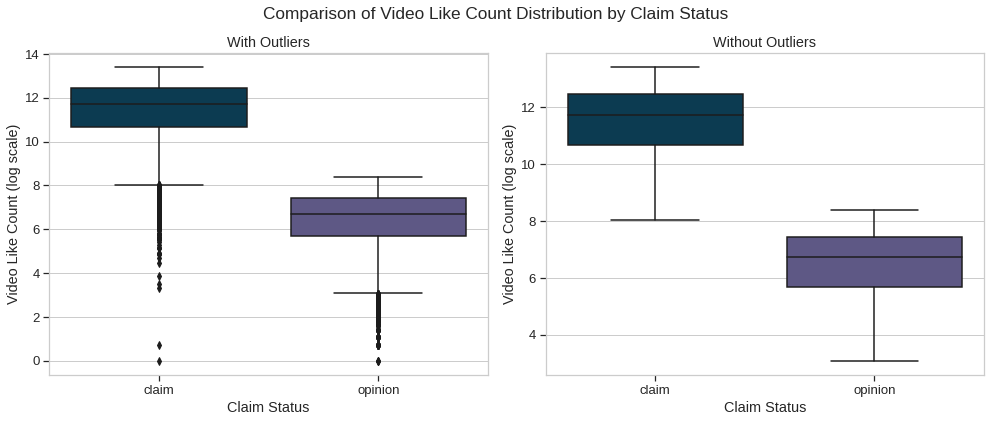

In [115]:
# Create a boxplot to visualize distribution of `video_like_count`

plt.figure(figsize=(14, 6))

# boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_like_count', data=data_filtered, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video Like Count (log scale)')
plt.title('With Outliers')

# boxplot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_like_count', data=data_filtered, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video Like Count (log scale)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video Like Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

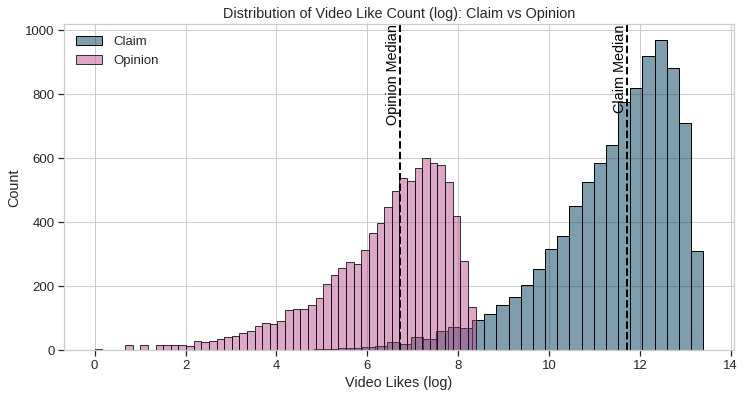

In [116]:
# Create a histogram
plt.figure(figsize=(12,6))
sns.histplot(data=data[data['claim_status'] == 'claim'], x='log_video_like_count', bins=50, color=claim_color, alpha=0.5, label='Claim')
sns.histplot(data=data[data['claim_status'] == 'opinion'], x='log_video_like_count', bins=50, color=opinion_color, alpha=0.5, label='Opinion')

claim_median = data[data['claim_status'] == 'claim']['log_video_like_count'].median()
opinion_median = data[data['claim_status'] == 'opinion']['log_video_like_count'].median()

# add median lines
plt.axvline(claim_median, color='black', linestyle='--', linewidth=2)
plt.axvline(opinion_median, color='black', linestyle='--', linewidth=2)

# add median labels
plt.text(claim_median, plt.ylim()[1], 'Claim Median', 
         rotation=90, va='top', ha='right', color='black')
plt.text(opinion_median, plt.ylim()[1], 'Opinion Median', 
         rotation=90, va='top', ha='right', color='black')

plt.xlabel('Video Likes (log)')
plt.ylabel('Count')
plt.title('Distribution of Video Like Count (log): Claim vs Opinion')
plt.legend()
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Insights:**
- The boxplot indicates claim videos tend to have a wider distribution of likes compared to opinion videos indicating a broader audience 
- The higher median for claims further supports the idea that on average claim videos receive more engagement than opinion videos 
- When outliers are removed the median for claims videos is still higher but the spread is reduced further supporting the idea that a subset of those videos drives the trend
- There is a wide distribution of claim likes with many videos having a high like count with heavy concentration in higher ranges (eg around 100K). In contrast opinions have a concentration of videos at lower like counts (eg 1K-10K)
- The wide range and higher median suggest that like count could be a strong predictive feature and worth further analysis
- However, given that both claim and opinions have significant outliers it might be useful to treat outliers separately or use robust modeling approaches less sensitive to extreme values in video like count

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

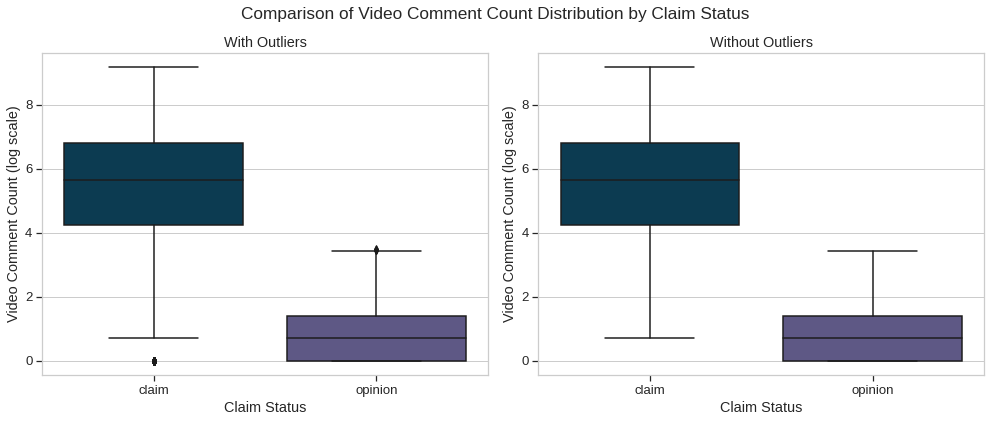

In [117]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(14, 6))

# boxplot with outliers for log_video_comment_count
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_comment_count', data=data_filtered, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video Comment Count (log scale)')
plt.title('With Outliers')

# boxplot without outliers for log_video_comment_count
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_comment_count', data=data_filtered, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video Comment Count (log scale)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video Comment Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

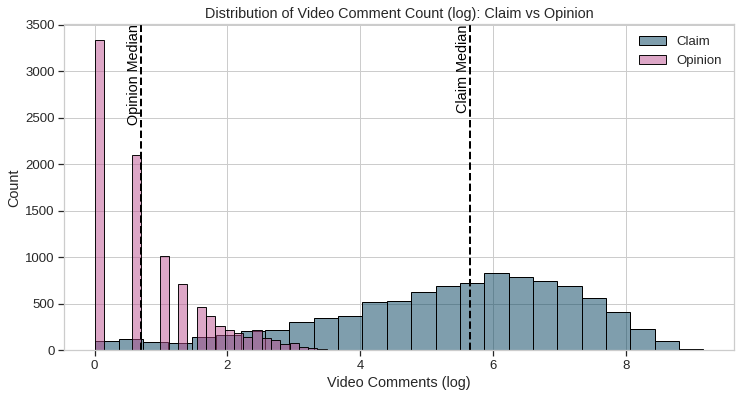

In [118]:
# Create a histogram

plt.figure(figsize=(12,6))
sns.histplot(data=data[data['claim_status'] == 'claim'], x='log_video_comment_count', bins=25, color=claim_color, alpha=0.5, label='Claim')
sns.histplot(data=data[data['claim_status'] == 'opinion'], x='log_video_comment_count', bins=25, color=opinion_color, alpha=0.5, label='Opinion')

claim_median = data[data['claim_status'] == 'claim']['log_video_comment_count'].median()
opinion_median = data[data['claim_status'] == 'opinion']['log_video_comment_count'].median()

# add median lines
plt.axvline(claim_median, color='black', linestyle='--', linewidth=2)
plt.axvline(opinion_median, color='black', linestyle='--', linewidth=2)

# add median labels
plt.text(claim_median, plt.ylim()[1], 'Claim Median', 
         rotation=90, va='top', ha='right', color='black')
plt.text(opinion_median, plt.ylim()[1], 'Opinion Median', 
         rotation=90, va='top', ha='right', color='black')

plt.xlabel('Video Comments (log)')
plt.ylabel('Count')
plt.title('Distribution of Video Comment Count (log): Claim vs Opinion')
plt.legend()
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Insights**:
- Claim videos generally have a higher central tendancy indicating they might lead to more discussion amongst viewers than opinion videos
- Claim videos also appear to have a wider, more varied audience commenting on them as compared to opinion videos  
- There are relatively fewer outliers in comment count but they still influences distribution. Removing them reduces the spread but doesnt seem to change the median much
- The histogram shows a clear distinction between claim and opinion videos. The broader range of comment counts with a distribution that extends further into higher comment counts is clear
- Most opinion videos have fewer than 20 comments. Unlike claim videos, the frequency drops off around 1.5 comments
- The higher median and wider range for claims suggest that comment count might be useful as a predictive features in distinguishing between the two types
- However, while the boxplot suggests that comments are less prone to extreme outliers they may not need to be handled (eg transformed) the skewness of the distribution suggests handling extreme values might be necessary

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

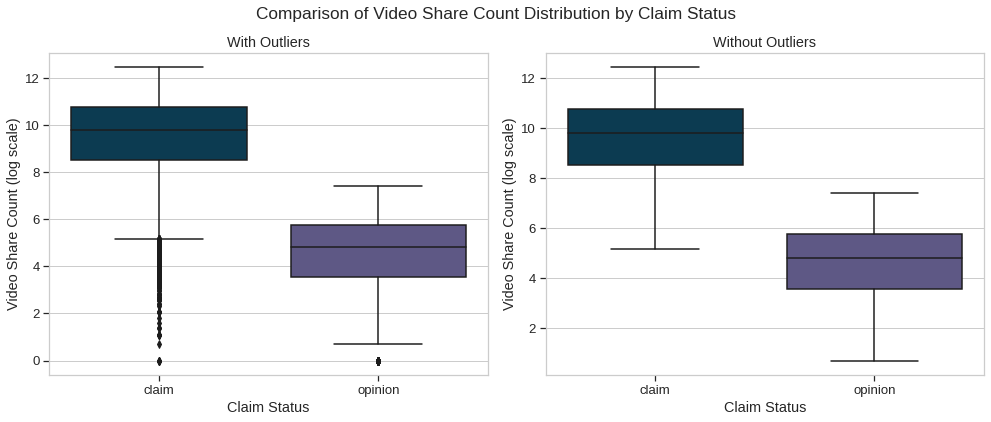

In [119]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(14, 6))

# boxplot with outliers 
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_share_count', data=data_filtered, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video Share Count (log scale)')
plt.title('With Outliers')

# boxplot without outliers 
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_share_count', data=data_filtered, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video Share Count (log scale)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video Share Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

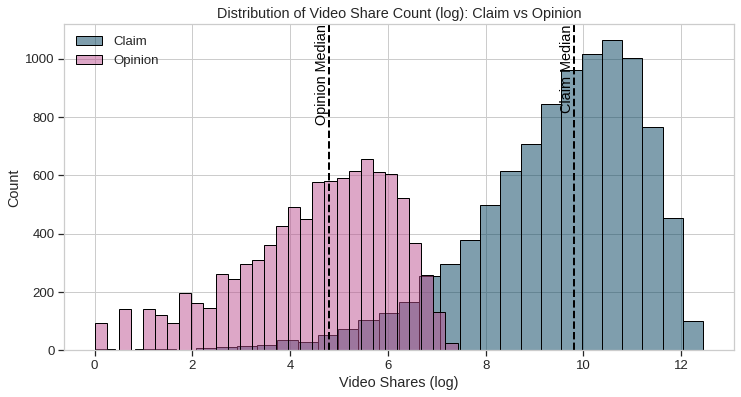

In [120]:
# Create a histogram

plt.figure(figsize=(12,6))
sns.histplot(data=data[data['claim_status'] == 'claim'], x='log_video_share_count', bins=30, color=claim_color, alpha=0.5, label='Claim')
sns.histplot(data=data[data['claim_status'] == 'opinion'], x='log_video_share_count', bins=30, color=opinion_color, alpha=0.5, label='Opinion')

claim_median = data[data['claim_status'] == 'claim']['log_video_share_count'].median()
opinion_median = data[data['claim_status'] == 'opinion']['log_video_share_count'].median()

# add median lines
plt.axvline(claim_median, color='black', linestyle='--', linewidth=2)
plt.axvline(opinion_median, color='black', linestyle='--', linewidth=2)

# add median labels
plt.text(claim_median, plt.ylim()[1], 'Claim Median', 
         rotation=90, va='top', ha='right', color='black')
plt.text(opinion_median, plt.ylim()[1], 'Opinion Median', 
         rotation=90, va='top', ha='right', color='black')

plt.xlabel('Video Shares (log)')
plt.ylabel('Count')
plt.title('Distribution of Video Share Count (log): Claim vs Opinion')
plt.legend()
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Insights**:
- Both claim and opinion distributions are right-skewed, suggesting a few outliers receive a disproportionate amount of share engagement
- Similar to likes, claim videos seem to have a wider distribution of shares, indicating a broader audience is sharing claim videos relative to opinion videos
- The median for claims remains higher even after removing significantly more outliers, supporting the idea that claim videos are more likely to be shared
- The significant number of outliers present on the low end of claims might indicate less shared claim videos 
- While the difference in distribution and median of share count suggest this feature could be helpful in predicting robust modeling approaches will be needed to handle the extreme values 

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

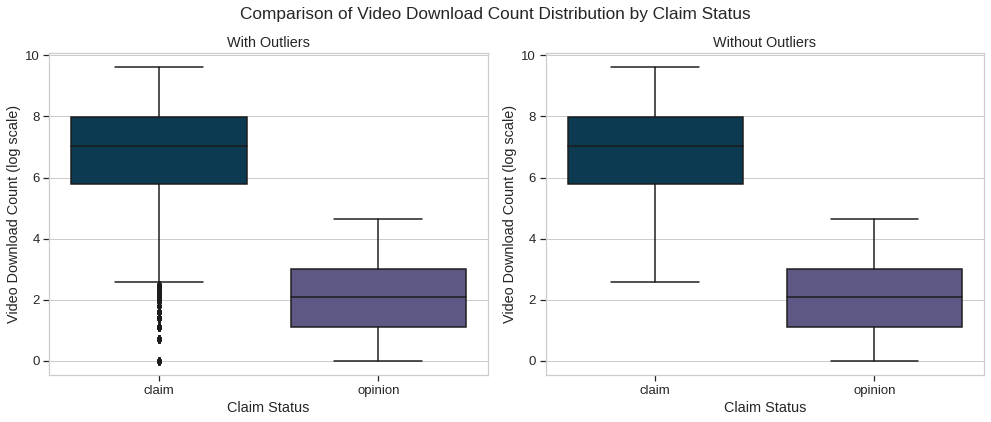

In [121]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(14, 6))

# boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_download_count', data=data_filtered, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video Download Count (log scale)')
plt.title('With Outliers')

# boxplot without outliers 
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_download_count', data=data_filtered, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video Download Count (log scale)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video Download Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

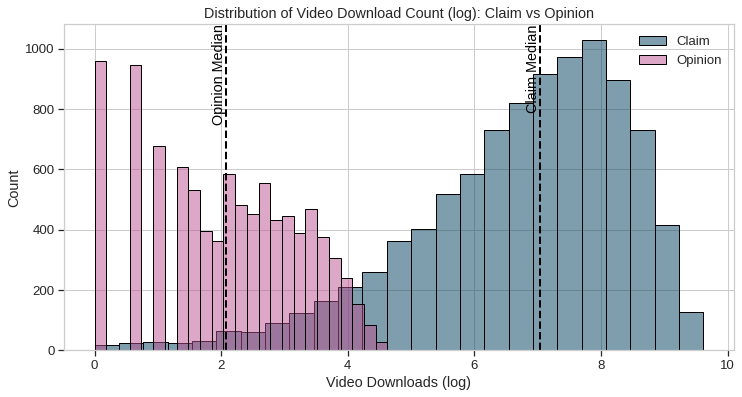

In [122]:
# Create a histogram
plt.figure(figsize=(12,6))

sns.histplot(data=data[data['claim_status'] == 'claim'], x='log_video_download_count', bins=25, color=claim_color, alpha=0.5, label='Claim')
sns.histplot(data=data[data['claim_status'] == 'opinion'], x='log_video_download_count', bins=25, color=opinion_color, alpha=0.5, label='Opinion')

claim_median = data[data['claim_status'] == 'claim']['log_video_download_count'].median()
opinion_median = data[data['claim_status'] == 'opinion']['log_video_download_count'].median()

# add median lines
plt.axvline(claim_median, color='black', linestyle='--', linewidth=2)
plt.axvline(opinion_median, color='black', linestyle='--', linewidth=2)

# add median labels
plt.text(claim_median, plt.ylim()[1], 'Claim Median', 
         rotation=90, va='top', ha='right', color='black')
plt.text(opinion_median, plt.ylim()[1], 'Opinion Median', 
         rotation=90, va='top', ha='right', color='black')

plt.xlabel('Video Downloads (log)')
plt.ylabel('Count')
plt.title('Distribution of Video Download Count (log): Claim vs Opinion')
plt.legend()
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Insights**:
- Claim videos have higher and wider distribution of download counts compared to opinion videos
- Even after removing outliers there is still a broader audience downloading claim videos suggesting that claim videos consistently are downloaded more
- The amount of outliers on the low end of claim downloads inidcates more variability in downloads relative to opinions  
- There is a steep drop off in opinion videos have greater than 2 downloads.
- Downloads is another feature where the the central tendancy and wider distribution might suggest it can be a good predictive feature but they need to be handled appropiately to account for the outlier variability 

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

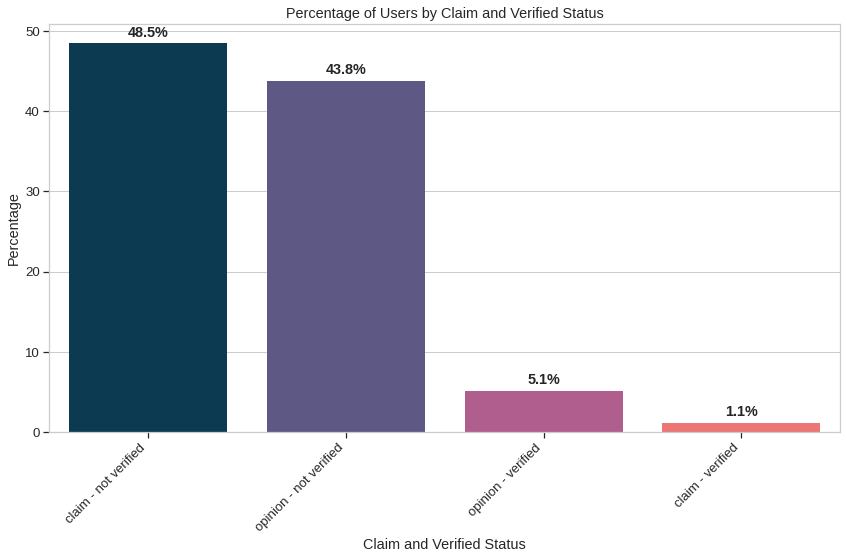

In [123]:
# create a new column combining vlaim_status and verified status

data_filtered['claim_verified_status'] = data_filtered['claim_status'] + ' - ' + data_filtered['verified_status']

# calculate percentages
status_counts = data_filtered['claim_verified_status'].value_counts()
status_percentages = status_counts / len(data) * 100

# set up the plot
plt.figure(figsize=(12,8))

# create a histogram of claim verified status
ax = sns.barplot(x=status_percentages.index, y=status_percentages.values)

# add labels to bars
for i, v in enumerate(status_percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Claim and Verified Status')
plt.ylabel('Percentage')
plt.title('Percentage of Users by Claim and Verified Status')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

- The majority of users posting both claims and opinions are unverified
- The chart highlights that claims are predominantly posted by unverified users (48.5%), with a minimal contribution from verified users (1.1%). In contrast, opinions also have a high percentage from unverified users (43.8%), but a relatively higher share comes from verified users (5.1%)
- This suggests that unverified users are more likely to post both claims and opinions, but verified users are disproportionately more inclined to post opinions rather than claims, possibly indicating a cautious approach towards content verification

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

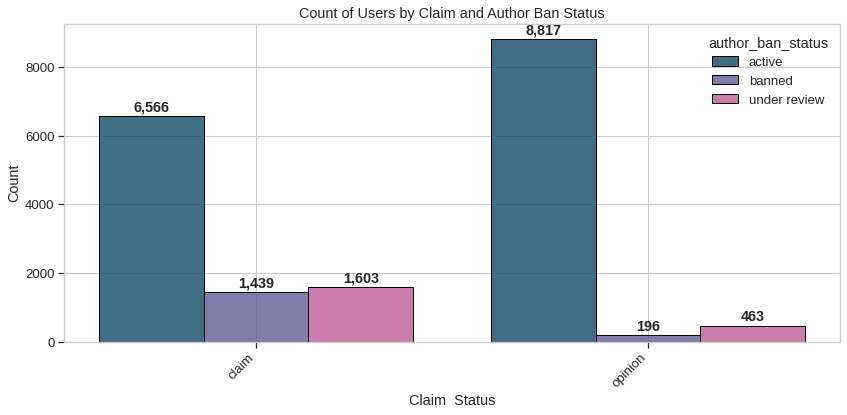

In [124]:
# Create a histogram
        
# group counts of each claim status by each author status
claim_author_status = data_filtered.groupby(['claim_status', 'author_ban_status'])['video_id'].count().reset_index(name='count')

plt.figure(figsize=(12,6))

# plot histogram for the count of each claim staus by author status
ax = sns.histplot(data=claim_author_status, x='claim_status', hue='author_ban_status', weights='count', multiple='dodge', discrete=True, shrink=0.8)

# get the x-positions and y-heights of the bars
bars = ax.patches

# add labels to bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        y = height
        label = f'{int(height):,}' 
        y_offset = 50
        ax.text(x, y + y_offset, label, ha='center', va='bottom', fontweight='bold')
        
plt.xlabel('Claim  Status')
plt.ylabel('Count')
plt.title('Count of Users by Claim and Author Ban Status')
plt.xticks(rotation = 45, ha='right')

plt.tight_layout()
plt.show()

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

- Banned and under review creators comprise a higher portion of the claim videos than the opinion videos
- Banned authors and under review creators represent 14.98% and 16.69% of claim data respectively
- Banned authors and under review creators represent 2.07% and 4.89% of opinion data respectively

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

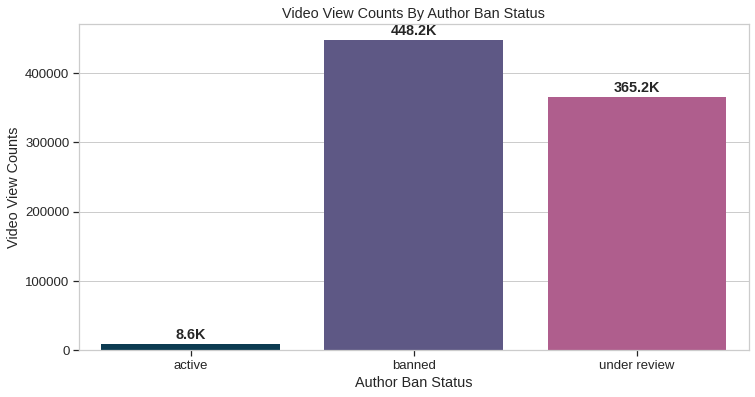

In [125]:
# Create a bar plot
author_views_medians = data_filtered.groupby('author_ban_status')['video_view_count'].median().reset_index()

plt.figure(figsize=(12,6))

# create barplot
p = sns.barplot(
    data = author_views_medians,
    x = 'author_ban_status',
    y = 'video_view_count')

# add labels
for b in p.patches:
    p.annotate(f'{b.get_height()/1000:.1f}K',
    (b.get_x() + b.get_width() / 2, b.get_height()),
    ha = 'center', va = 'bottom',
    xytext = (0, 2),
    textcoords = 'offset points',
    fontweight='bold')
    
plt.xlabel("Author Ban Status")
plt.ylabel("Video View Counts")
plt.title("Video View Counts By Author Ban Status")

plt.show()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

The median views for banned and under review creators are significantly higher than those for active creators, with banned creators having the highest median view count. This suggegsts that videos from banned and under review authors tend to be viewed more. Based on this, the author ban status could be a strong indicator of claim status

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

**Question:** What do you notice about the overall view count for claim status?

### Additional: filtering opinions for video views >=~1K and downsampling claim videos to compare provide more insight on view count comparison by type ###


In [126]:
# As noted earlier all claim videos had greater than 1,049 views in this sample
# This is unlikely to be random and more likely to be a biased sample (perhaps an unenvly applied threshold)
# Below the opinion view data is filtered for >=1,049 views to better compare vs claim videos
# Then the the claim video data is downsampled so we have the same amount of views of each

# filter opinion videos with video views >= 1,049
opinion_filtered = data_filtered[(data_filtered['claim_status'] == 'opinion') & 
                                 (data_filtered['video_view_count'] >= 1049)]

# get the number of opinion videos after filtering
num_opinion_videos_filtered = opinion_filtered.shape[0]

# downsample claim videos to match the number of filtered opinion videos
claim_filtered = data_filtered[data_filtered['claim_status'] == 'claim'].sample(n=num_opinion_videos_filtered, random_state=42)

# check count before combining
print(f"Opinion filtered count: {num_opinion_videos_filtered}")
print(f"Claim filtered count: {claim_filtered.shape[0]}")

# combine the filtered and downsampled data
combined_filtered_data = pd.concat([claim_filtered, opinion_filtered])

# check the shape
print(combined_filtered_data.shape)

Opinion filtered count: 8408
Claim filtered count: 8408
(16816, 19)


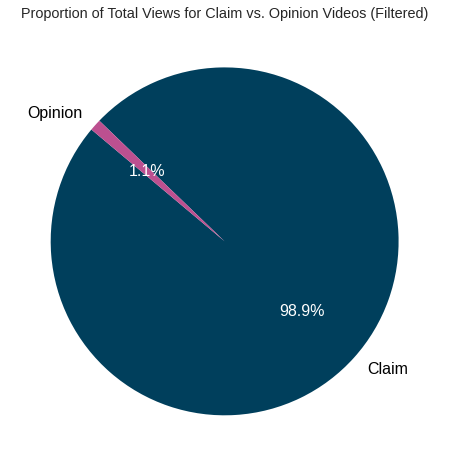

In [127]:
# Create an adjusted pie chart
# calculate total views for claim and opinion in the filtered dataset
total_views_claim_filtered = combined_filtered_data[combined_filtered_data['claim_status'] == 'claim']['video_view_count'].sum()
total_views_opinion_filtered = combined_filtered_data[combined_filtered_data['claim_status'] == 'opinion']['video_view_count'].sum()
total_views_filtered = total_views_claim_filtered + total_views_opinion_filtered

# calculate the proportion of views for each
proportion_claim_filtered = total_views_claim_filtered / total_views_filtered
proportion_opinion_filtered = total_views_opinion_filtered / total_views_filtered

# data for the pie chart
labels = ['Claim', 'Opinion']
sizes = [total_views_claim_filtered, total_views_opinion_filtered]

# colors for the pie chart
pie_colors = [claim_color, opinion_color]

# create the pie chart with the specified style
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=pie_colors, textprops={'fontsize': 16, 'color': 'white'})
plt.title('Proportion of Total Views for Claim vs. Opinion Videos (Filtered)')

# adjust non-% label colors to black
for text in plt.gca().texts:
    if "%" not in text.get_text(): 
        text.set_color("black")


plt.show()


In [128]:
# calculate the total view count and count of videos for each category
grouped_data = combined_filtered_data.groupby('claim_status').agg(
    total_view_count=('video_view_count', 'sum'),
    video_count=('video_view_count', 'size')
)

# calculate the combined total view count across both groups.
combined_total_views = combined_filtered_data['video_view_count'].sum()
combined_video_count = combined_filtered_data.shape[0]

def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-6)
    return s

grouped_data['total_view_count'] = grouped_data['total_view_count'].apply(readable_numbers)
grouped_data

total_view_count  video_count
claim_status                              
claim                 4220.6M         8408
opinion                 46.4M         8408

**Pie chart conclusion**: Even when opinion view data is filtered for videos with greater than ~1K views and the claims view data is randomly downsampled to match opinion video count, claim videos still account for 98.9% of the video views


### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [138]:
# trying to adhere to DRY while keeping each Jupyter cell self-contained
def outlier_mask(data, feature, method="median"):
    '''
    Function to calculate a boolean series indicating whether values in a feature are outliers 
    based on a median (vs mean) ± 1.5 * IQR method
    '''
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    median = data[feature].median()

    lower_threshold = median - 1.5 * IQR
    upper_threshold = median + 1.5 * IQR

    return (data[feature] < lower_threshold) | (data[feature] > upper_threshold)

In [136]:
def count_outliers(data, feature):
    '''
    User outlier_mask to return the count of outliers
    '''
    return outlier_mask(data, feature).sum()

# create a list of engagement features
engagement_features = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# iterate through list of features and calculate outliers 
for feature in engagement_features:
    outliers = count_outliers(data_filtered, feature)
    print(f'Number of outliers, {feature}: {outliers}')                       

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


### Additional: percentage outlier calculation of log transformed data broken down by claim status  ###


In [141]:
def outlier_percentage(data, feature):
    '''
    Use outlier_mask to teturn the percentage of outliers
    '''
    mask = outlier_mask(data, feature)
    return mask.sum() / len(data) * 100

print("Percentage of Median-Based Outliers Detected By Claim vs Opinion Status:")

# isolate claim and opinion videos
claim_data = data_filtered[data_filtered['claim_status'] == 'claim']
opinion_data = data_filtered[data_filtered['claim_status'] == 'opinion']

# create a list of log engagement features
log_engagement_features = ['log_video_view_count', 'log_video_like_count', 'log_video_share_count', 'log_video_download_count', 'log_video_comment_count']

# iterate through claim and opinion videos and calculate outlier percentages 
for feature in log_engagement_features:
    claim_percentage = outlier_percentage(claim_data, feature)
    opinion_percentage = outlier_percentage(opinion_data, feature)
    
    print(f'\n{feature}:')
    print(f'  Claims:   {claim_percentage:.2f}%')
    print(f'  Opinions: {opinion_percentage:.2f}%')
    print(f'  Difference: {abs(claim_percentage - opinion_percentage):.2f}%')

Percentage of Median-Based Outliers Detected By Claim vs Opinion Status:

log_video_view_count:
  Claims:   9.83%
  Opinions: 10.15%
  Difference: 0.33%

log_video_like_count:
  Claims:   7.26%
  Opinions: 7.41%
  Difference: 0.14%

log_video_share_count:
  Claims:   5.79%
  Opinions: 5.29%
  Difference: 0.50%

log_video_download_count:
  Claims:   6.10%
  Opinions: 0.00%
  Difference: 6.10%

log_video_comment_count:
  Claims:   5.41%
  Opinions: 2.25%
  Difference: 3.16%


#### **Scatterplot**

In [172]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
# Note I use log transformaed video view counts to indicate the extent of the difference 

def get_outlier_boolean_series(data,feature):
    '''
    Use outlier_mask, as-is, returning that boolean series with 'True' for outliers
    '''
    return outlier_mask(data, feature)

# add outlier columns for view and like count
data_filtered['view_outlier'] = get_outlier_boolean_series(data_filtered, 'log_video_view_count')
data_filtered['like_outlier'] = get_outlier_boolean_series(data_filtered, 'log_video_like_count')

# create a combined outlier column
data_filtered['is_outlier'] = np.where(data_filtered['view_outlier'] | data_filtered['like_outlier'],
                                       'Outlier',
                                       'Not Outlier')
# create scatterplot
fig = px.scatter(data_filtered,
                x='log_video_view_count',
                y='log_video_like_count',
                color='claim_status',
                hover_data=['is_outlier'],
                title='Video View Count vs. Video Like Count based on Claim Status',
                labels={
                    'log_video_like_count': 'Video Likes (log)',
                    'log_video_view_count': 'Video Views (log)',
                    'claim_status': 'Claim Status',
                    'is_outlier': 'Outlier Status',
                },
                color_discrete_map={
                    'claim': claim_color,
                    'opinion': opinion_color
                }
                )

fig.update_layout(
    xaxis_title='Video Views (log)',
    yaxis_title='Video Likes (log)',
    legend_title_text='Claim Status',
    plot_bgcolor='#F5F5F5',  
    paper_bgcolor='#F5F5F5'
    )

fig.update_traces(marker=dict(size=8, opacity=0.5, line=dict(width=1, color='Grey')))

fig.show()


In [173]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
# Note I use log transformaed video view counts to indicate the extent of the difference
# filter opinions

opinion_data = data_filtered[data_filtered['claim_status'] == 'opinion']

# create scatter
fig = px.scatter(opinion_data,
                    x='log_video_view_count',
                    y='log_video_like_count',
                    title='Video View Count vs Video Like Count for Opinions (log)',
                    labels= {
                        'video_view_count': 'Video Views (log)',
                        'video_like_count': 'Video Likes (log)'
                    },
                    color_discrete_sequence=[opinion_color]
                )

# update layout for readability
fig.update_layout(
    xaxis_title='Video Views (log)',
    yaxis_title='Video Likes (log)',
    plot_bgcolor='#F5F5F5',  
    paper_bgcolor='#F5F5F5'
)
fig.update_traces(marker=dict(size=8, opacity=0.5, line=dict(width=1, color='Grey')))

fig.show()


You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.


## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


Yes.
### I have learned ....
- **Engagement**:  the data reveals that video views and likes, especially when viewed on a log scale are strongly correlated with the claim status. Claims tend to accumulate likes more rapidly and have a broader audience as compared to opinions. This suggests claims and likes are critical in distinguishing between claim and opinion data

- **Outliers**: Theres a high variability, in particularly in the claim data and particularly in metrics like likes and shares. These outliers may indicate controversioal or viral content which could impact the models ability to generalize if not handled

- **Author Ban Status**: There is a notable relationship between ban status and content type suggesting it could be helpful in distinguishing between claims and opinions. Authors of claim videos are more likely to be either banned or under review compared to those of opinion videos

### My questions are ....

**Data validation**
- Why are there no claim videos with less than ~1K views, given this was a random sample of >9K claim videos?
- Can I have accesss to or get a sense of the characteristics of the claim videos with with ~<1K views if they exist in the dataset
- Can we verify the data source to ensure the outliers are not errors

**What drives engagement difference between claim and opinion videos?**
- Are there specific topics that trend to result in higher engagement for each video type and are those topics more prevalent in claims videos? 

**Video length segment patterns**
- Why did the sample only include videos with lengths of 60 seconds or less?
- Does segmenting by video length chosen during video creation lead to further insight?

### TikTok would likely want to know ...
**Actionable Insight**: 

**General**: The analysis indicates that claim videos generally have much higher engagement metrics compared to opinion videos. For instance, claims in this sample account for >98% of video views and the median view count for claims is over 500K while for opinion videos its under 5K. 

**Key Features**: Video view counts and like counts, particularly on a log scale appear to be the strongest indicators of whether a video is a claim or an opinion

**Outliers**: some claim based videos exhibit extreme engagement metrics which can distort the model performance. I'd recommend running models both with and without these outliers to determine the best approach for handling them

**Other Features**: 
- Verified users make up a higher proportion of opinion video creators (10.46%) compared to claim video creators (2.18%). It should should be considered as a feature for the model
- Banned and under review creators compare a much hugher portion of claim videos (31.67% combined) compared to opinion videos (6.96% combined). The strong association between ban status and claims suggest author ban status could be a valuable predictor in the model and warrants further analysis

**Data Quality Concerns**: There were no claim videos with less than ~1K views in a sample of >9K claim videos. This warrants further investigation. Also, I removed 298 videos from the data set for most of the analysis as the claim status for that data was unknown 

**Next Steps**:
- Additional data validation to address the above-mentioned issues
- Further analysis on author ban status and verification status
- A baseline model that can be used to identify key features followed by hyperparameter tuning. Also, evaluating the impact of the outliers on model accuracy to refine approach 


### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

- Garbage in garbage out. The six main practices of EDA: discovering, structuring, cleaning, joining, validating and presenting are critical to providing accurate and accessible insight into a dataset.  
- Discovering helps the person performing the data conceptualize how to use it
- Structuring the data organizes & transforms it to be more easily visualized, explained or modeled
- Cleaning the data removes errors to make it more useful
- Joining the data augments it with other data sources making the combined data even more useful
- Validating verifies the data is consistent and high quality
- Presenting the data makes it accessible to stakeholders

Visualizations helped me understand ..

- what follow-on visualizations are required to provide key insight
- how to clean a dataset for more analysis
- how to make data useful for modeling 
- the characteristics of the data itself


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.